# AIML Capstone Project: Interim Report
## Topic: Computer Vision - Object Detection (Car)
### Batch: Apr20B
### Group: 4
##### Mentor: Kaustubh Sakhare
##### Group Members: Ramnath Natarajan, Aravind Muthu Suthan T, Natarajan T, Kartik Muthuswamy

# **PRE-WORK**

**IMPORTING BASIC LIBRARIES AND MOUNT DRIVE**

In [ ]:
#IMPORTING BASIC LIBRARIES 
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tensorflow.__version__

'2.4.1'

In [ ]:
# MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SETTING WORKING DIRECTORY AND FILES IN THE WORKING DIRECTORY**

In [ ]:
#SETTING WORKING DIRECTORY
import os
os.chdir('/content/drive/MyDrive/capstone')
cwd = os.getcwd()
print('Current working directory: ', cwd)
import warnings
warnings.filterwarnings("ignore")

Current working directory:  /content/drive/MyDrive/capstone


In [ ]:
#FILES IN THE WORKING DIRECTORY
!ls

anno_test.csv  anno_train.csv  archive.zip  Capstone.ipynb  car_data  names.csv


In [ ]:
# List of directories in train data
os.listdir("car_data/car_data/train")

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

# **DATA EXPLORATION AND STUDY**

**EXPLORING NAMES CSV FILE TO UNDERSTAND THE CLASS NAMES OF EACH VEHICLE**

In [ ]:
# Exploring Names CSV file in the dataset
import numpy as np
import pandas as pd
COL_NAMES=['DESCRIPTION']
CAR_NAME=pd.read_csv('names.csv',header=None,index_col=False,names=COL_NAMES)
CAR_NAME.index = np.arange(1, len(CAR_NAME) + 1)
print(CAR_NAME.shape)
CAR_NAME.tail(25)


(196, 1)


,DESCRIPTION
172,Plymouth Neon Coupe 1999
173,Porsche Panamera Sedan 2012
174,Ram CV Cargo Van Minivan 2012
175,Rolls-Royce Phantom Drophead Coupe Convertible...
176,Rolls-Royce Ghost Sedan 2012
177,Rolls-Royce Phantom Sedan 2012
178,Scion xD Hatchback 2012
179,Spyker C8 Convertible 2009
180,Spyker C8 Coupe 2009
181,Suzuki Aerio Sedan 2007


##### It is observed that the vechiles are grouped into 196 classes.

**VISUALISATION OF A RANDOM IMAGE**

In [ ]:
# Defining a function for the random image 
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

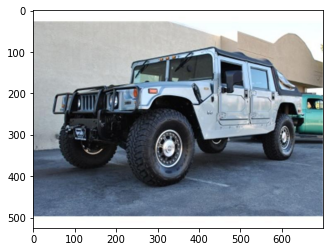

In [ ]:
#Loading a  random image to see how it looks like
from matplotlib import pyplot
%matplotlib inline
image = load_image("/content/drive/MyDrive/capstone/car_data/car_data/train/AM General Hummer SUV 2000/00163.jpg")
pyplot.imshow(image)

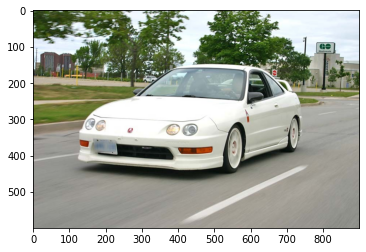

In [ ]:
image_1 = load_image("/content/drive/MyDrive/capstone/car_data/car_data/test/Acura Integra Type R 2001/00128.jpg")
pyplot.imshow(image_1)

In [ ]:
# Checking shape of a random image
print (image.shape)
print(image_1.shape)

(525, 700, 3)
(600, 900, 3)


##### It is observed that the images are in different sizes and it has to be resized during model building

**EXTRACTING TRAINING IMAGES PATH ,CLASS AND BOUNDING BOX DETAILS FROM THE ANNO_TRAIN CSV FILE**

In [ ]:
# path for train csv file
TRAIN_CSV =('/content/drive/MyDrive/capstone/anno_train.csv')
TRAIN_CSV
pp_train="/content/drive/MyDrive/capstone/car_data/car_data/train"

In [ ]:
# Getting X and y  Values
import csv
IMAGE_SIZE = 128
with open(TRAIN_CSV, "r") as f:
  
  y_train = np.zeros((sum(1 for line in f), 5))
  X_train = []
  f.seek(0)
  data = csv.reader(f, delimiter=',')
  for index, row in enumerate(data):
    for i, r in enumerate(row[1:7]):
      row[i+1] = int(r)
    number,x0,y0,x1,y1,vehicle_class = row
    img_path=pp_train+"/"+CAR_NAME.at[vehicle_class,'DESCRIPTION']+"/" +number      # Read image, its dimensions, BBox coords
    y_train[index, 0] = x0                 # Normalize bounding box by image size
    y_train[index, 1] = y0                # Normalize bounding box by image size
    y_train[index, 2] = (x1-x0)         # Normalize bounding box by image size
    y_train[index, 3] = (y1-y0)  
    y_train[index,4] =vehicle_class        # Normalize bounding box by image size

    X_train.append(img_path) 

In [ ]:
y_train[0]

array([ 39., 116., 530., 259.,  14.])

In [ ]:
X_train[0]

'/content/drive/MyDrive/capstone/car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg'

In [ ]:
print(y_train.shape)
len(X_train)

(8144, 5)


8144

##### Following details are extracted from the given anno_train csv files.
 ######  1.Totally 8144 images are available in the training dataset
 ###### 2.Location path of each image is extracted to X_train variable.(This has to be changed to numpy array later).
###### 3.Bounding box details and class of each vechile image is extracted to y_train variable.

**PLOTTING TRAINING CAR IMAGES , IT'S CLASS AND IT'S BOUNDING BOX**

VEHICLE MODEL : Audi TTS Coupe 2012


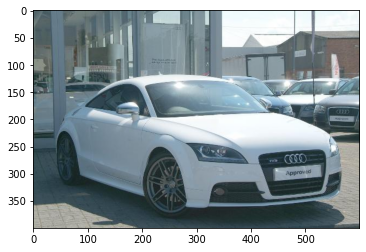

In [ ]:
# checking vehicle model and image
image = load_image(X_train[0])
pyplot.imshow(image)
region_1= y_train[0]
print('VEHICLE MODEL :' , CAR_NAME.at[int(region_1[4]),'DESCRIPTION'])

VEHICLE MODEL : Jeep Grand Cherokee SUV 2012


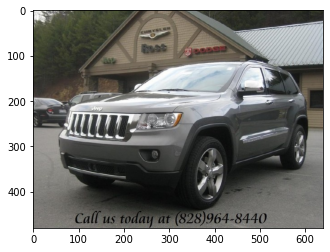

In [ ]:
# checking vehicle model and image
image = load_image(X_train[2000])
pyplot.imshow(image)
region_1= y_train[2000]
print('VEHICLE MODEL :' , CAR_NAME.at[int(region_1[4]),'DESCRIPTION'])

In [ ]:
# Pick a random image and its bounding box to check how it looks
filename = X_train[2000]
unscaled = cv2.imread(filename)
region = y_train[2000]
unscaled.shape
x0 = int(region[0])
y0 = int(region[1])

x3 = int(region[2])
y3= int(region[3])
print(x0,y0,x3,y3)


56 110 553 330


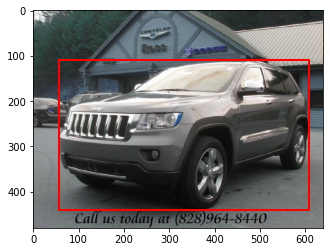

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x3, y3, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

**EXTRACTING TESTING IMAGES PATH ,CLASS AND BOUNDING BOX DETAILS FROM THE ANNO_TEST CSV FILE**

In [ ]:
# path for train csv file
Test_CSV =('/content/drive/MyDrive/capstone/anno_test.csv')
Test_CSV
pp_test="/content/drive/MyDrive/capstone/car_data/car_data/test"

In [ ]:
# Getting X and y  Values
import csv
IMAGE_SIZE = 128
with open(Test_CSV, "r") as f:
  
  y_test = np.zeros((sum(1 for line in f), 5))
  X_test = []
  f.seek(0)
  data = csv.reader(f, delimiter=',')
  for index, row in enumerate(data):
    for i, r in enumerate(row[1:7]):
      row[i+1] = int(r)
    number,x0,y0,x1,y1,vehicle_class = row # Read image,BBox coords, its class    
    img_path=pp_test+"/"+CAR_NAME.at[vehicle_class,'DESCRIPTION']+"/" +number      
    y_test[index, 0] = x0                
    y_test[index, 1] = y0                
    y_test[index, 2] = (x1-x0)         
    y_test[index, 3] = (y1-y0)  
    y_test[index,4] =vehicle_class        

    X_test.append(img_path) 

In [ ]:
y_test.shape

(8041, 5)

In [ ]:
len(X_test)

8041

In [ ]:
X_test[0]

'/content/drive/MyDrive/capstone/car_data/car_data/test/Suzuki Aerio Sedan 2007/00001.jpg'

In [ ]:
y_test[0]

array([ 30.,  52., 216.,  95., 181.])

##### Following details are extracted from the given anno_test csv files.
 ######  1.Totally 8041 images are available in the testing dataset
 ###### 2.Location path of each image is extracted to X_test variable.(This has to be changed to numpy array later).
###### 3.Bounding box details and class of each vechile image is extracted to y_test variable.


**PLOTTING TESTING CAR IMAGES , CLASS AND IT'S BOUNDING BOX**

VEHICLE MODEL : Audi S5 Convertible 2012


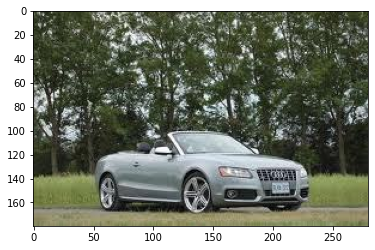

In [ ]:
# checking vehicle model and image
image = load_image(X_test[1000])
pyplot.imshow(image)
region_1= y_test[1000]
print('VEHICLE MODEL :' , CAR_NAME.at[int(region_1[4]),'DESCRIPTION'])

In [ ]:
# Pick a random image and its bounding box to check how it looks
filename = X_test[1000]
unscaled = cv2.imread(filename)
region = y_test[1000]
unscaled.shape
x4 = int(region[0])
y4 = int(region[1])

x5 = int(region[2])
y5= int(region[3])
print(x0,y0,x3,y3)

77 73 553 330


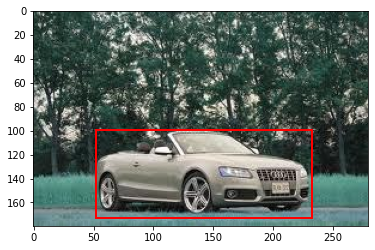

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x4, y4), x5, y5, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# **DATA PRE-PROCESSING - TRAINING DATA SET**

**RESIZE THE TRAINING IMAGES FOR MODEL BUILDING AND SCALING THE BOUNDING BOX TO IMAGE SIZE**

In [ ]:
# SCALING THE BOUNDING BOX TO IMAGE SIZE 
import cv2
IMAGE_SIZE=128 # Choosen for mobilenet
y_train_sc = np.zeros([8144,5])
for i,g in enumerate(X_train):
  filename = X_train[i]
  unscaled = cv2.imread(filename)
  region = y_train[i]
  image_height, image_width, _ = unscaled.shape
  y_train_sc[i,0]=region[4]
  y_train_sc[i,1] = region[0] * IMAGE_SIZE/ image_width
  y_train_sc[i,2] = region[1] * IMAGE_SIZE/ image_height

  y_train_sc[i,3] = region[2]* IMAGE_SIZE / image_width
  y_train_sc[i,4]= region[3] * IMAGE_SIZE / image_height 

In [ ]:
X_train_sc=X_train
len(X_train_sc)

8144

In [ ]:
# RESIZE THE IMAGE
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

for i, f in enumerate(X_train_sc):
  img = Image.open(f) # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_train_sc[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()


In [ ]:
X_train_sc = np.array(X_train_sc)

In [ ]:
print(X_train_sc.shape)
print(y_train_sc.shape)

(8144, 128, 128, 3)
(8144, 5)


In [ ]:
y_train_sc[1]

array([  3.        ,   5.12      ,  21.99703704, 118.32888889,
        89.31555556])

In [ ]:
X_train[1]

array([[[ 0.35686278,  0.38823533,  0.43529415],
        [ 0.41176474,  0.4431373 ,  0.48235297],
        [ 0.45098042,  0.4666667 ,  0.5137255 ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.38823533,  0.41960788,  0.4666667 ],
        [ 0.427451  ,  0.45098042,  0.49803925],
        [ 0.45882356,  0.48235297,  0.52156866],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.41960788,  0.45882356,  0.49803925],
        [ 0.4431373 ,  0.47450984,  0.52156866],
        [ 0.45882356,  0.48235297,  0.52156866],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       ...,

       [[ 0.12156868,  0.05098045, -0.01176471],
        [ 0

##### Thus all the training images are resized and scaled accoring to mobilenet algorithm. The variable X_train_sc has the numpy array of all training images and y_train_sc has the bounding box details and corresponding vehicle class of all training images. This has to be given as the input for the model. 

**PLOTTING RESIZED TRAINING IMAGE AND ITS CORRESPONDING SCALED BOUNDING BOX**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


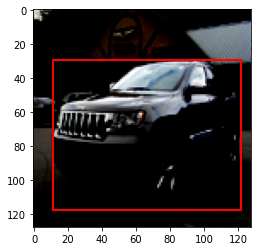

In [ ]:
fig,ax = plt.subplots(1)
plt.imshow(X_train_sc[2000])
rect = patches.Rectangle((y_train_sc[2000,1], y_train_sc[2000,2]), y_train_sc[2000,3],y_train_sc[2000,4], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


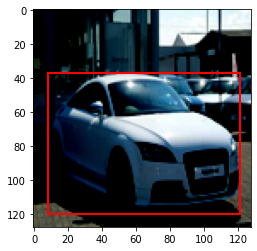

In [ ]:
fig,ax = plt.subplots(1)
plt.imshow(X_train_sc[0])
rect = patches.Rectangle((y_train_sc[0,1], y_train_sc[0,2]), y_train_sc[0,3],y_train_sc[0,4], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

# **DATA PRE-PROCESSING - TESTING DATA SET**

**RESIZE ALL THE TESTING IMAGES FOR MODEL BUILDING AND SCALING THE BOUNDING BOX TO IMAGE SIZE**

In [ ]:
X_test_sc=X_test
X_test_sc[1]

'/content/drive/MyDrive/capstone/car_data/car_data/test/Ferrari 458 Italia Convertible 2012/00002.jpg'

In [ ]:
# SCALING THE BOUNDING BOX TO IMAGE SIZE 
import cv2
IMAGE_SIZE=128
y_test_sc = np.zeros([8041,5])
for i,g in enumerate(X_test):
  filename = X_test[i]
  unscaled = cv2.imread(filename)
  region = y_test[i]
  image_height, image_width, _ = unscaled.shape
  y_test_sc[i,0]=region[4]
  y_test_sc[i,1] = region[0] * IMAGE_SIZE/ image_width 
  y_test_sc[i,2] = region[1] * IMAGE_SIZE/ image_height

  y_test_sc[i,3] = region[2]* IMAGE_SIZE / image_width
  y_test_sc[i,4]= region[3] * IMAGE_SIZE / image_height 

In [ ]:
# RESIZE THE IMAGE
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

for i, f in enumerate(X_test):
  img = Image.open(f) # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_test[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [ ]:
X_test_sc = X_test
X_test_sc=np.array(X_test_sc)
X_test_sc.shape

(8041, 128, 128, 3)

In [ ]:
print (y_test_sc.shape)
print(X_test_sc.shape)

(8041, 5)
(8041, 128, 128, 3)


##### Thus all the testing images are resized and scaled accoring to mobilenet algorithm. The variable X_test_sc has the numpy array of all testing images and y_test_sc has the bounding box details and corresponding vehicle class of all testing images. This has to be used for model validation purposes.

**PLOTTING RESIZED TESTING IMAGE AND ITS CORRESPONDING SCALED BOUNDING BOX**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


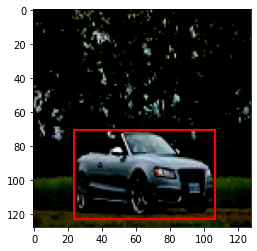

In [ ]:
fig,ax = plt.subplots(1)
plt.imshow(X_test_sc[1000])
rect = patches.Rectangle((y_test_sc[1000,1], y_test_sc[1000,2]), y_test_sc[1000,3],y_test_sc[1000,4], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
print("Shape of X_train,y_train", X_train_sc.shape,y_train_sc.shape)
print("Shape of X_test,y_test", X_test_sc.shape,y_test_sc.shape)

Shape of X_train,y_train (8144, 128, 128, 3) (8144, 5)
Shape of X_test,y_test (8041, 128, 128, 3) (8041, 5)


##### Thus the dataset is preprocessed and ready for model building

**MODEL BUILDING**

In [ ]:
# Importing libraries for Mobilent
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

In [ ]:
# Model Creation (is in progress)
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=True, alpha=ALPHA) # Load pre-trained mobilenet
    
    for layer in model.layers:
        layer.trainable = trainable

    
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    
    x2 = Reshape((5,))(x1) 

    return Model(inputs=model.input, outputs=x2)